# Disclaimer  
* This project is only for personal challenge and educational purpose, no other pretention than those ones.
* My goal was not to (obviously) reivent the wheel, you will find nothing really new here. (Almost) eveything comes from public Kaggle kernels and this 'work' is highly inspired from several (good) readings
* In the end, objective was also to discover, understand and improve my personal skills in data exploration, correlation + manipulation of pandas, seaborn packages.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')

### Who and how many died ?

There were 342 survivors


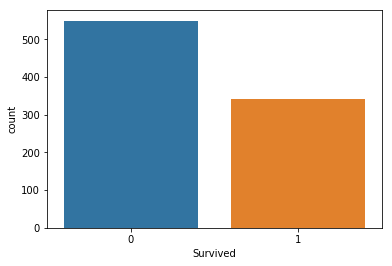

In [41]:
survivors = train_df['Survived'].sum()
print("There were {} survivors".format(survivors))
sns.countplot('Survived', data=train_df)

        Survived
Sex             
female       233
male         109


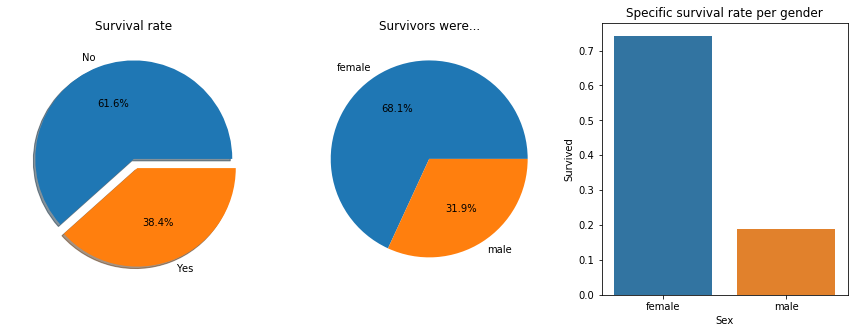

In [54]:
# Another way to visualize it: using pie chart & percentage value
# Among those 342 survivors, analyze 'Sex' repartition
gender_survival = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=True).sum().sort_values(by='Survived', ascending=False)
gender_mean_survival = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(gender_survival)

labels = 'No', 'Yes'
counts = train_df['Survived'].value_counts()
explode = (0, 0.1)  # only "explode" the 1st slice (i.e. 'Yes')

figure, axis = plt.subplots(1, 3, figsize=(15,5))
axis[0].set_title('Survival rate')
axis[1].set_title('Survivors were...')
axis[2].set_title('Specific survival rate per gender')
axis[0].pie(counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
axis[1].pie(gender_survival, labels=gender_survival.index.values, autopct='%1.1f%%')
axis[2] = sns.barplot(x='Sex', y='Survived', data=gender_mean_survival)
plt.show()

**Observations**:
* In 'Training' dataset 38% of people survived (remember that overall survival rate was 32%) -> ***sample is representative***
* *Women had better chance to survive* (almost ~74% --> 'ladies first !')
_______________________________________________________________________________________________________________________________

### Checking impact of 'Age' feature

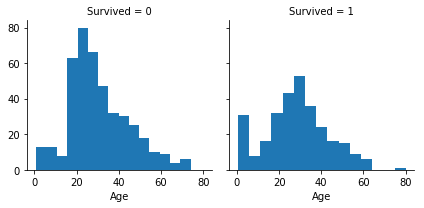

In [43]:
# Let's start with a basic histogram printing
facet_grid = sns.FacetGrid(train_df, col='Survived')
facet_grid.map(plt.hist, 'Age', bins=15)

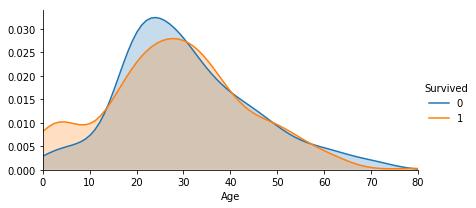

In [44]:
# Another way to display it
facet_grid = sns.FacetGrid(train_df, hue="Survived",aspect=2)
facet_grid.map(sns.kdeplot,'Age',shade= True)  # kde = kernel density estimate
facet_grid.set(xlim=(0, train_df['Age'].max()))
facet_grid.add_legend()

**Observations**:
* Quite *a lot of children did survive* ('children first')
* Oldest people (near 80 years old) survived as well but not the ones between ~62y and ~78y
* ***Most people between 15y and 35y died***  
==> could be good to create some age ranges check the survival rate among each one. Let's do it !

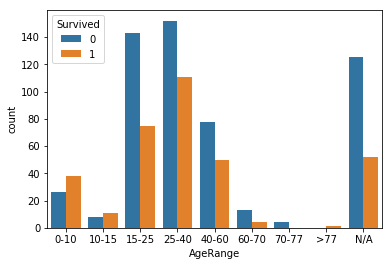

In [45]:
# Ranges here are random and not based on a actual cut of the whole age range (could be improved)
def build_age_range(row):
    val = ''
    if (0 < row.Age <= 10):
        val = '0-10'
    elif (10 < row.Age <= 15):
        val = '10-15'
    elif (15 < row.Age <= 25):
        val = '15-25'
    elif (25 < row.Age <= 40):
        val = '25-40'
    elif (40 < row.Age <= 60):
        val = '40-60'
    elif (60 < row.Age <= 70):
        val = '60-70'
    elif (70 < row.Age <= 77):
        val = '70-77'
    elif pd.isnull(row.Age):
        val = 'N/A'
    else:
        val = '>77'
    row.AgeRange = val
    return row
    
train_df['AgeRange'] = train_df['Age']
train_df = train_df.apply(build_age_range, axis='columns')
ranges = sorted(train_df.AgeRange.unique())
sns.countplot('AgeRange', hue='Survived', data=train_df, order=ranges)

### Checking impact of 'Pclass' feature

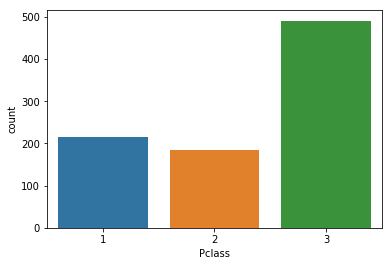

In [46]:
# Let's start by showing repartition
sns.countplot('Pclass', data=train_df)

In [47]:
pd.crosstab([train_df.Pclass, train_df.Survived], train_df.Pclass, margins=True)

Pclass             1    2    3  All
Pclass Survived                    
1      0          80    0    0   80
       1         136    0    0  136
2      0           0   97    0   97
       1           0   87    0   87
3      0           0    0  372  372
       1           0    0  119  119
All              216  184  491  891

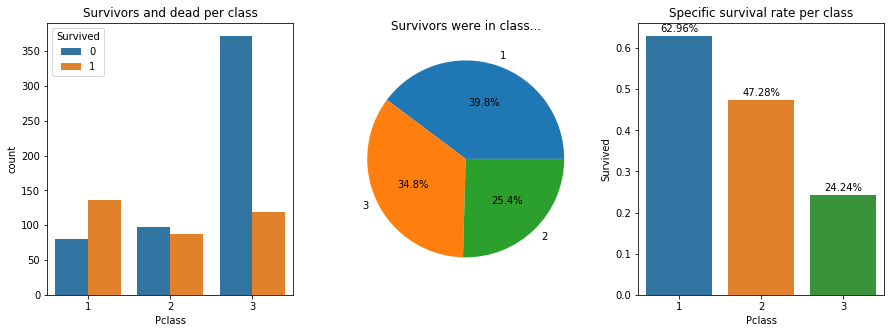

In [55]:
# Visualize survival rate for each Pclass, over all survivors and specifically among each class
pclass_survival = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum().sort_values(by='Survived', ascending=False)
pclass_mean_survival = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

figure, axis = plt.subplots(1, 3, figsize=(15,5))
axis[0].set_title('Survivors and dead per class')
axis[1].set_title('Survivors were in class...')
axis[2].set_title('Specific survival rate per class')

sns.countplot('Pclass', hue='Survived', data=train_df, ax = axis[0])
axis[1].pie(pclass_survival, labels=pclass_survival.index.values, autopct='%1.1f%%')
axis[2] = sns.barplot(x='Pclass', y='Survived', data=pclass_mean_survival)

# Trick to display value on barplot graph
for p in axis[2].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 0.01
    value = '{:.2f}%'.format(p.get_height() * 100)
    axis[2].text(_x, _y, value, ha="center")

**Observations**:
* *Most of the people were in class '3'* (total = 481, among 891 passengers --> ~55%)
* ***Better chance to survive in class '1' than '3'***: ~40% vs. 25% overall, ~63% of people in 1st class survived  
==> Combine 'Sex' with 'Pclass' to see whether it is important or not

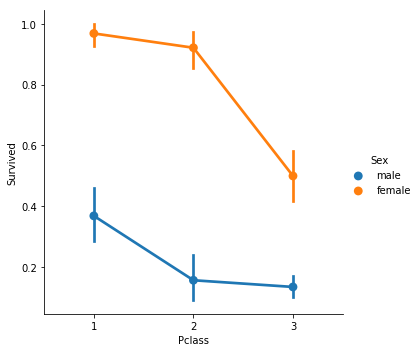

In [49]:
# Use factorplot which is a categorical plot
sns.factorplot('Pclass','Survived', hue='Sex', data=train_df)

**Observations:**  
With the *'ladies first' policy*, women from 1st class were (almost) all saved. Still good result for 2nd class but only 50% chance while in third class.  
Men, even from 1st class, mainly died and survival rate is very low and quite the same for 2nd and 3rd class.  
_______________________________________________________________________________________________________________________________

### Checking impact of 'Embarked' feature
Remember that we have seen that in 'Training', more people came from 'S' port (top = 'S' and freq = 644 -> ~72%). Let's analyze in more details.

In [50]:
pd.crosstab([train_df.Embarked, train_df.Survived], train_df.Embarked, margins=True)

Embarked             C   Q    S  All
Embarked Survived                   
C        0          75   0    0   75
         1          93   0    0   93
Q        0           0  47    0   47
         1           0  30    0   30
S        0           0   0  427  427
         1           0   0  217  217
All                168  77  644  889

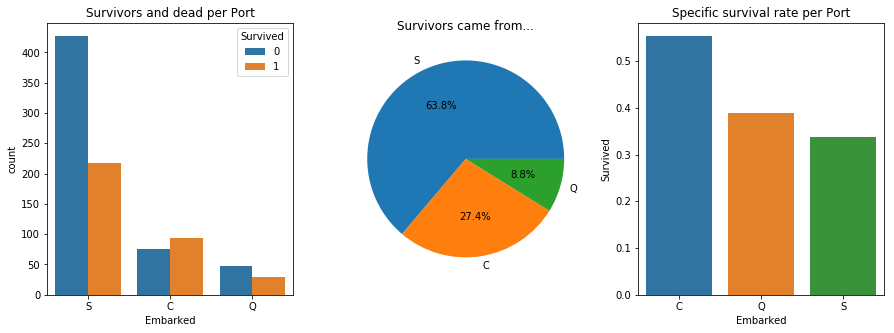

In [51]:
# Visualize survival rate for each Embarked value, over all survivors and specifically among each 'port'
port_survival = train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).sum().sort_values(by='Survived', ascending=False)
port_mean_survival = train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

figure, axis = plt.subplots(1, 3, figsize=(15,5))
axis[0].set_title('Survivors and dead per Port')
axis[1].set_title('Survivors came from...')
axis[2].set_title('Specific survival rate per Port')

sns.countplot('Embarked', hue='Survived', data=train_df, ax = axis[0])
axis[1].pie(port_survival, labels=port_survival.index.values, autopct='%1.1f%%')
axis[2] = sns.barplot(x='Embarked', y='Survived', data=port_mean_survival)

**Observations:**
* Most of the survivors come from 'S' port but also most of them died, remember that 72% of people came from 'S' --> absolutely no relation between the survival chance and fact that people embarked at 'S'
* People who embarked at 'C' survived better than others (~55% vs. ~40% vs. ~33%)

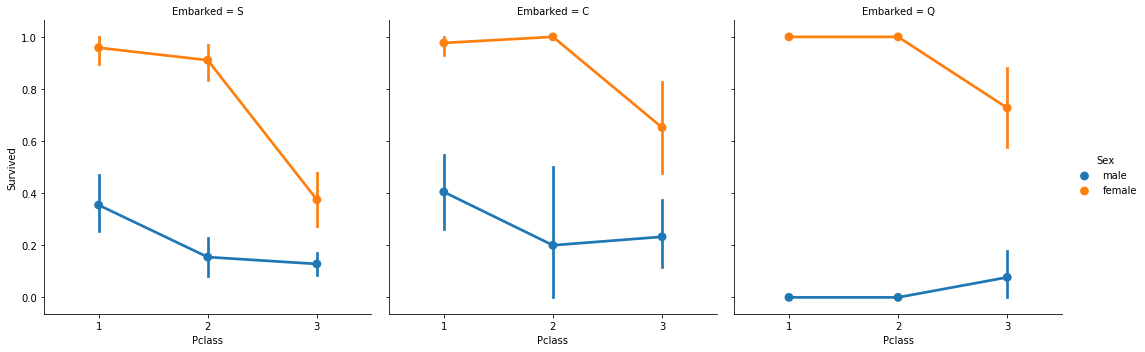

In [52]:
# Keep going on this feature with factorplot
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=train_df)

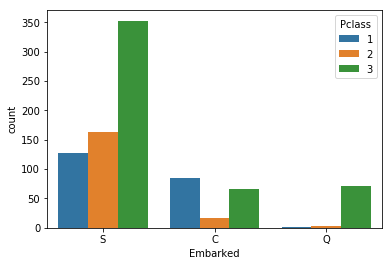

In [53]:
# Classes vs. Ports
sns.countplot('Embarked', hue='Pclass', data=train_df)

**Observations:**
* Few chance to survive for men from 'Q' port, no matter of the class. But we see also that 1st and 2nd classes are not represented for this 'Q' port (~95% are in 3rd class) -> so if of course the few people from 'Q' and 1st class died, survival chance is very low.
_______________________________________________________________________________________________________________________________

### Checking impact of 'Sibsp' and 'Parch' feature (i.e families)
We will try to determine whether families had better chance or not to survive than people who travelled alone.  
Memo: Sibling = brother, sister, stepbrother, stepsister / Spouse = husband, wife

In [94]:
# Let's start by building a feature 'Family' that will combine parents/children + siblings/spouse
train_df['Family'] = train_df['SibSp'] + train_df['Parch']

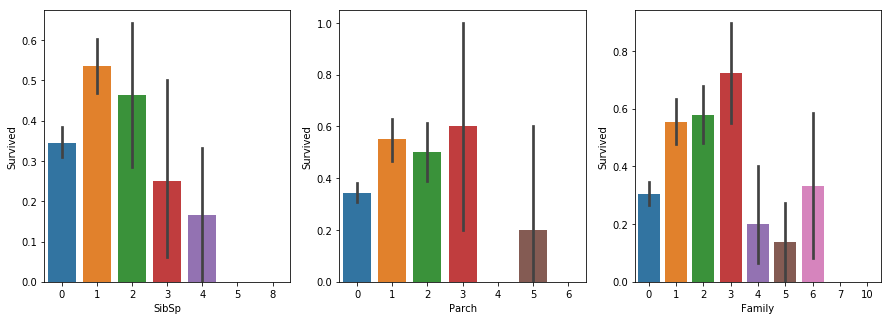

In [95]:
# Better chance to survive alone or with your family ?
figure, axis = plt.subplots(1, 3, figsize=(15,5))
sns.barplot('SibSp', 'Survived', data=train_df, ax=axis[0])
sns.barplot('Parch', 'Survived', data=train_df, ax=axis[1])
sns.barplot('Family', 'Survived', data=train_df, ax=axis[2])

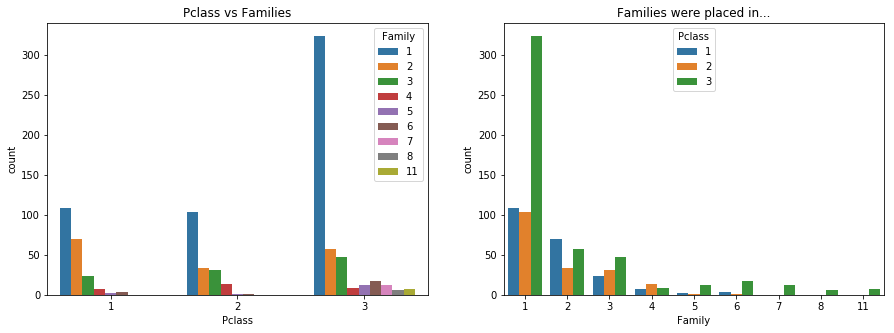

In [89]:
# Where were those people ?
figure, axis = plt.subplots(1, 2, figsize=(15,5))
axis[0].set_title('Pclass vs Families')
axis[1].set_title('Families were placed in...')

sns.countplot('Pclass', hue='Family', data=train_df, ax = axis[0])
sns.countplot('Family', hue='Pclass', data=train_df, ax = axis[1])

**Observation:**  
* 'Small' families had better chance to survive as shown on the first graphs. This is mainly due to the fact that those one were more on 1st or 2nd class (bigger families, >4 members, were on 3rd class).
* Travelling alone led to only ~35% for survival (better results with families from 1 to 4 members).

### Checking impact of 'Fare' feature
Analyze correlation between ticket fare and survival chance (+ Pclass). This variable is a continuous one.

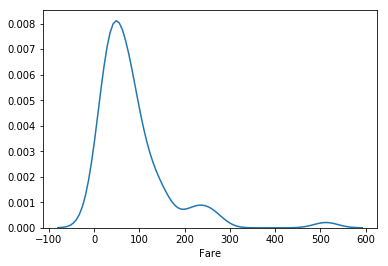

In [80]:
# As said on seaborn documentation, "the most convenient way to take a quick look at a univariate distribution is the distplot
# function. By default, this will draw a histogram and fit a kernel density estimate (KDE)."
sns.distplot(train_df.Fare, hist=False)

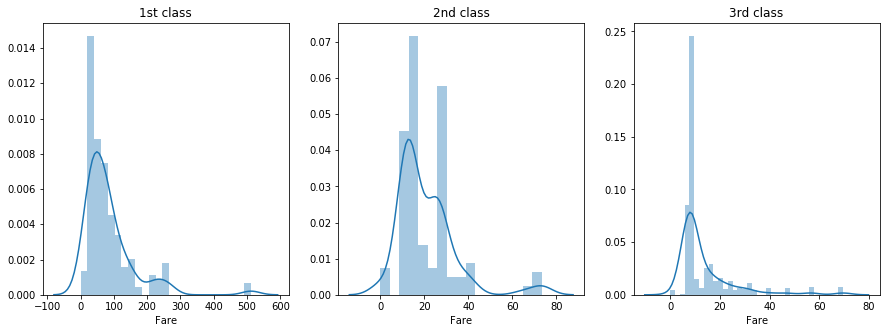

In [86]:
# Let's display class per class
figure, axis = plt.subplots(1, 3, figsize=(15,5))
axis[0].set_title('1st class')
axis[1].set_title('2nd class')
axis[2].set_title('3rd class')
sns.distplot(train_df.loc[train_df['Pclass'] == 1].Fare, ax=axis[0])
sns.distplot(train_df.loc[train_df['Pclass'] == 2].Fare, ax=axis[1])
sns.distplot(train_df.loc[train_df['Pclass'] == 3].Fare, ax=axis[2])

**Observation:**  
Not so much to say, distribution is larger for 1st class than in others.

In [99]:
# Build a Fare Range
train_df['FareRange'] = pd.qcut(train_df['Fare'], 4)
farerange_survival = train_df[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='Survived', ascending=True)
print(farerange_survival)

         FareRange  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


**Observation:**  
The most expensive was the ticket, better was the survival chance.